In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
file_path = '/content/House_Price.csv'  # Update this with the actual file path
data = pd.read_csv(file_path)

In [4]:
# Step 1: Understand the Problem and the Data
print("Data Shape:", data.shape)
print("Data Types:\n", data.dtypes)

Data Shape: (506, 19)
Data Types:
 price          float64
crime_rate     float64
resid_area     float64
air_qual       float64
room_num       float64
age            float64
dist1          float64
dist2          float64
dist3          float64
dist4          float64
teachers       float64
poor_prop      float64
airport         object
n_hos_beds     float64
n_hot_rooms    float64
waterbody       object
rainfall         int64
bus_ter         object
parks          float64
dtype: object


In [5]:
# Step 2: Import and Inspect the Data
print("First Few Rows:\n", data.head())
print("Summary Statistics:\n", data.describe())
print("Missing Values:\n", data.isnull().sum())


First Few Rows:
    price  crime_rate  resid_area  air_qual  room_num   age  dist1  dist2  \
0   24.0     0.00632       32.31     0.538     6.575  65.2   4.35   3.81   
1   21.6     0.02731       37.07     0.469     6.421  78.9   4.99   4.70   
2   34.7     0.02729       37.07     0.469     7.185  61.1   5.03   4.86   
3   33.4     0.03237       32.18     0.458     6.998  45.8   6.21   5.93   
4   36.2     0.06905       32.18     0.458     7.147  54.2   6.16   5.86   

   dist3  dist4  teachers  poor_prop airport  n_hos_beds  n_hot_rooms  \
0   4.18   4.01      24.7       4.98     YES       5.480      11.1920   
1   5.12   5.06      22.2       9.14      NO       7.332      12.1728   
2   5.01   4.97      22.2       4.03      NO       7.394     101.1200   
3   6.16   5.96      21.3       2.94     YES       9.268      11.2672   
4   6.37   5.86      21.3       5.33      NO       8.824      11.2896   

  waterbody  rainfall bus_ter     parks  
0     River        23     YES  0.049347  
1  

In [6]:
# Step 3: Handling Missing Values
# Impute missing values in 'n_hos_beds' with the mean
data['n_hos_beds'].fillna(data['n_hos_beds'].mean(), inplace=True)
print("Missing Values After Imputation:\n", data.isnull().sum())


Missing Values After Imputation:
 price            0
crime_rate       0
resid_area       0
air_qual         0
room_num         0
age              0
dist1            0
dist2            0
dist3            0
dist4            0
teachers         0
poor_prop        0
airport          0
n_hos_beds       0
n_hot_rooms      0
waterbody      155
rainfall         0
bus_ter          0
parks            0
dtype: int64


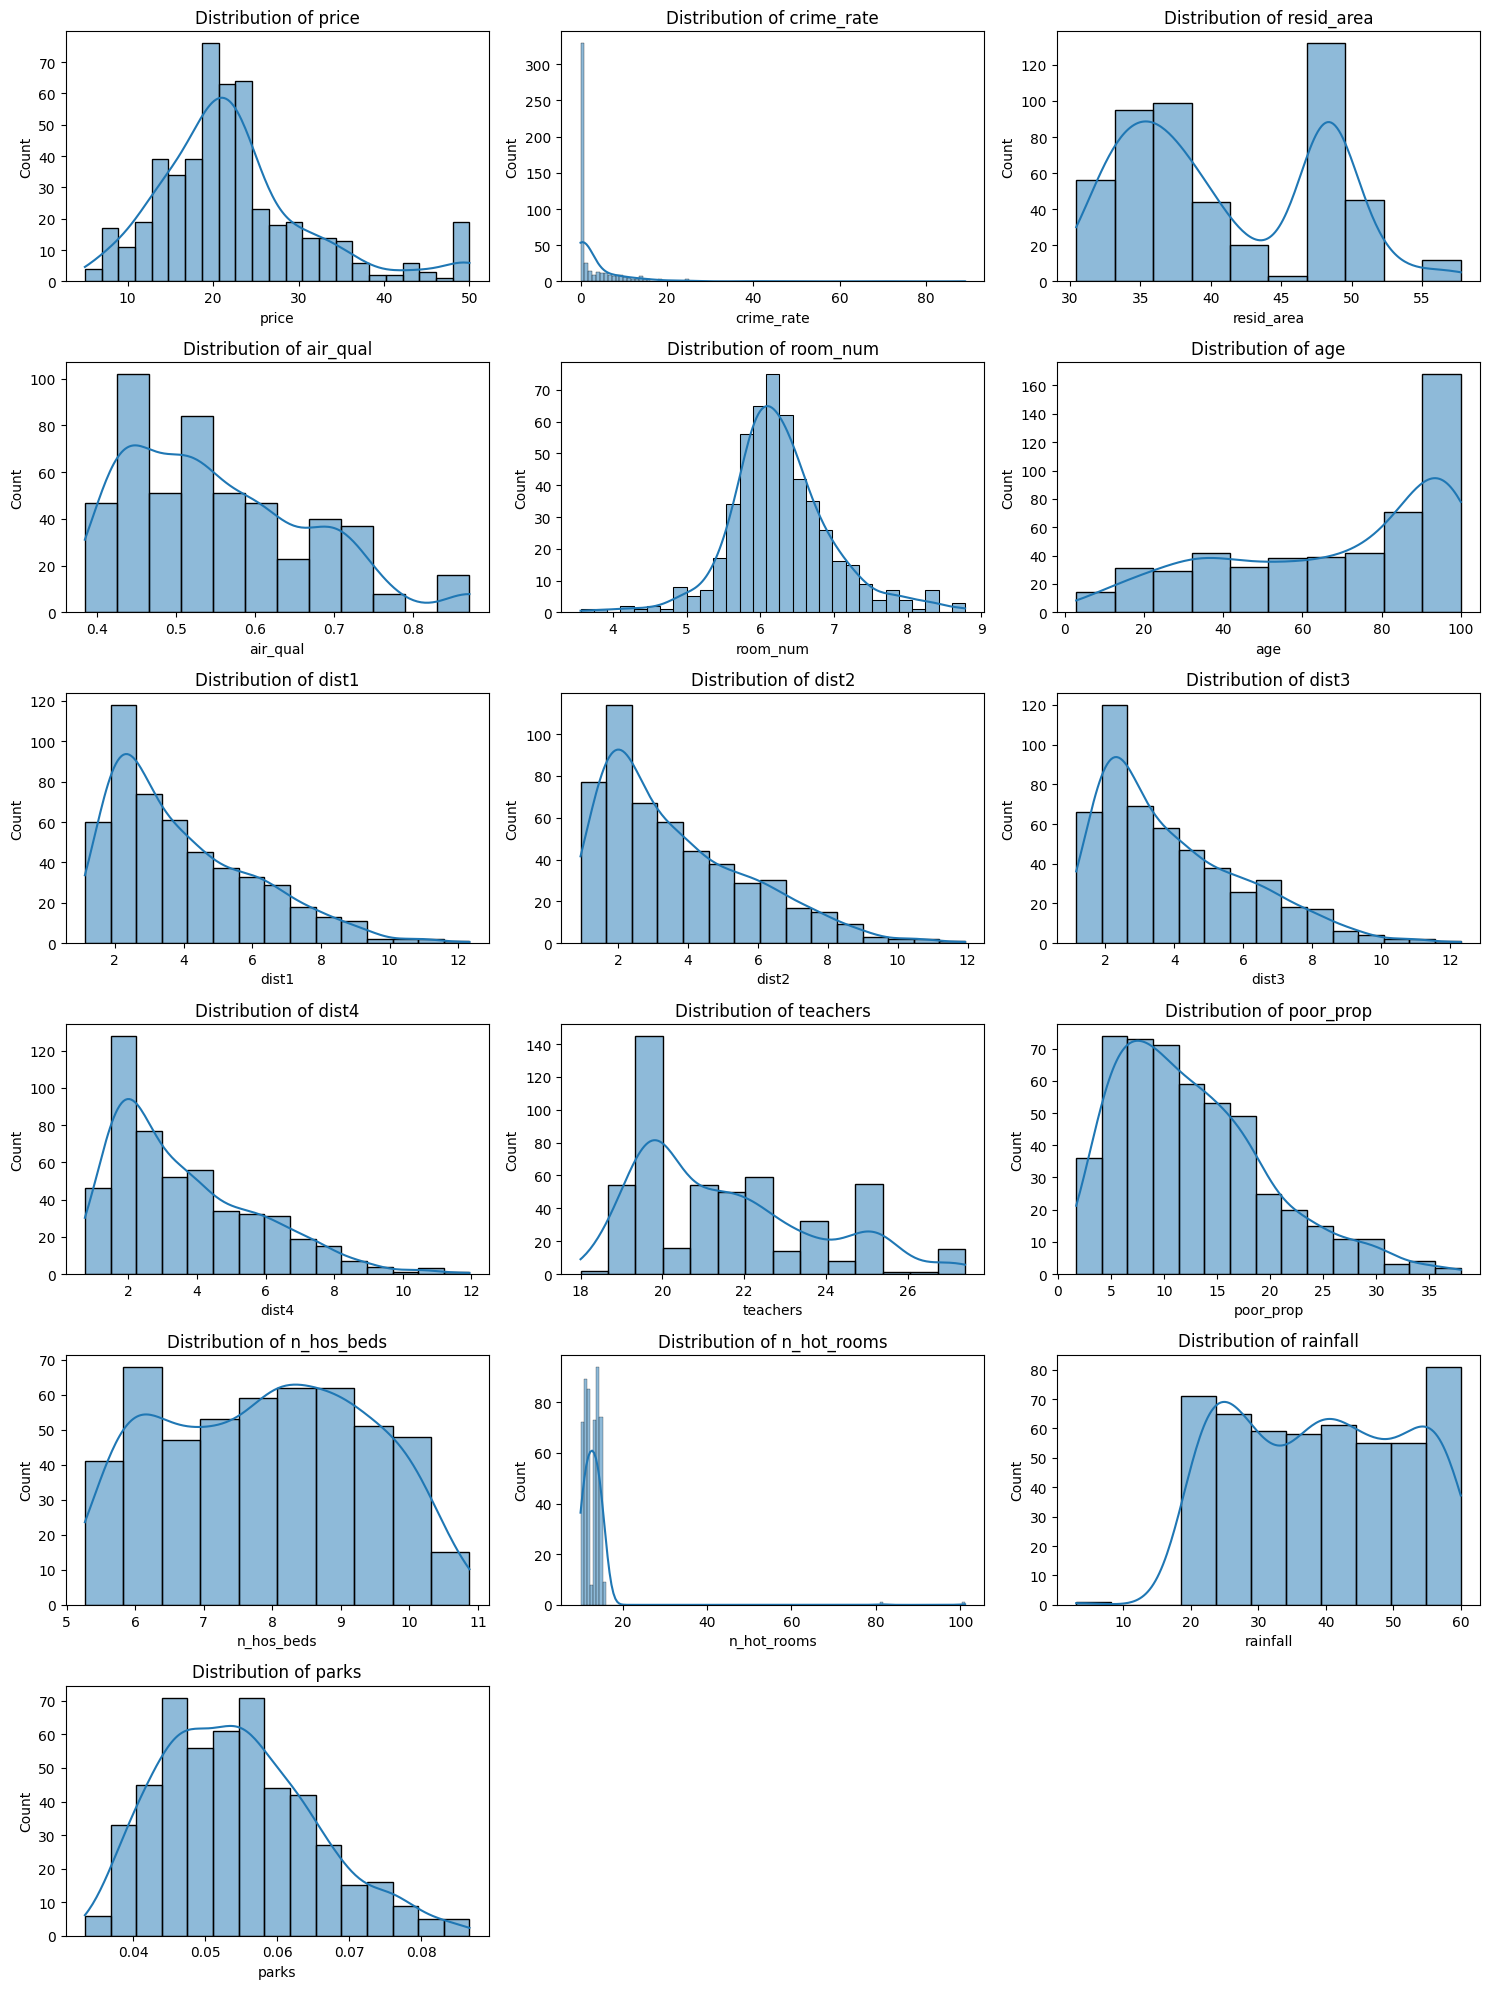

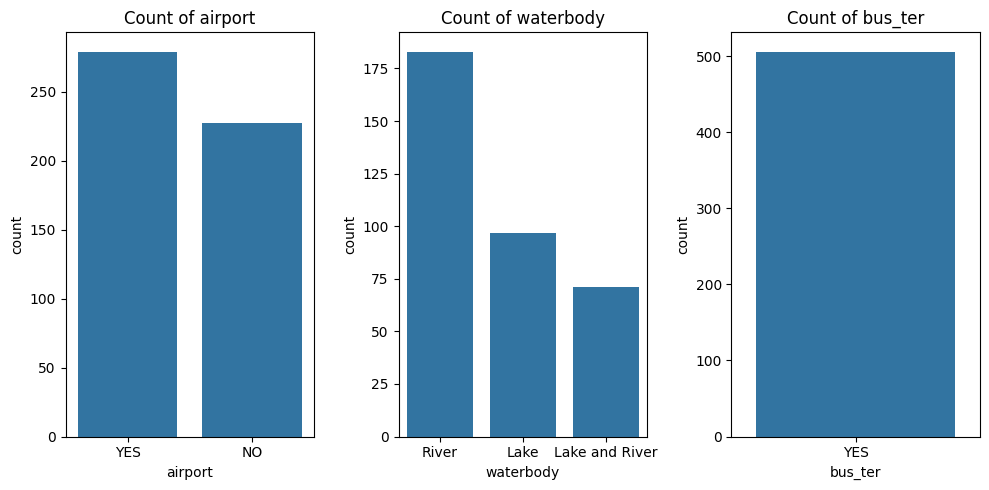

In [12]:
# Step 4: Explore Data Characteristics
# Continuous variables
continuous_vars = [
    'price', 'crime_rate', 'resid_area', 'air_qual', 'room_num', 'age',
    'dist1', 'dist2', 'dist3', 'dist4', 'teachers', 'poor_prop',
    'n_hos_beds', 'n_hot_rooms', 'rainfall', 'parks'
]

# Categorical variables
categorical_vars = ['airport', 'waterbody', 'bus_ter']

# Distribution plots for continuous variables
plt.figure(figsize=(15, 20))
for i, var in enumerate(continuous_vars):
    plt.subplot(6, 3, i + 1)  # Adjust layout to avoid the error
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

# Count plots for categorical variables
plt.figure(figsize=(10, 5))
for i, var in enumerate(categorical_vars):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=data[var])
    plt.title(f'Count of {var}')
plt.tight_layout()
plt.show()


In [13]:
# Step 5: Perform Data Transformation
# Encoding categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_vars, drop_first=True)
print("Data After Encoding:\n", data_encoded.head())


Data After Encoding:
    price  crime_rate  resid_area  air_qual  room_num   age  dist1  dist2  \
0   24.0     0.00632       32.31     0.538     6.575  65.2   4.35   3.81   
1   21.6     0.02731       37.07     0.469     6.421  78.9   4.99   4.70   
2   34.7     0.02729       37.07     0.469     7.185  61.1   5.03   4.86   
3   33.4     0.03237       32.18     0.458     6.998  45.8   6.21   5.93   
4   36.2     0.06905       32.18     0.458     7.147  54.2   6.16   5.86   

   dist3  dist4  teachers  poor_prop  n_hos_beds  n_hot_rooms  rainfall  \
0   4.18   4.01      24.7       4.98       5.480      11.1920        23   
1   5.12   5.06      22.2       9.14       7.332      12.1728        42   
2   5.01   4.97      22.2       4.03       7.394     101.1200        38   
3   6.16   5.96      21.3       2.94       9.268      11.2672        45   
4   6.37   5.86      21.3       5.33       8.824      11.2896        55   

      parks  airport_YES  waterbody_Lake and River  waterbody_River  


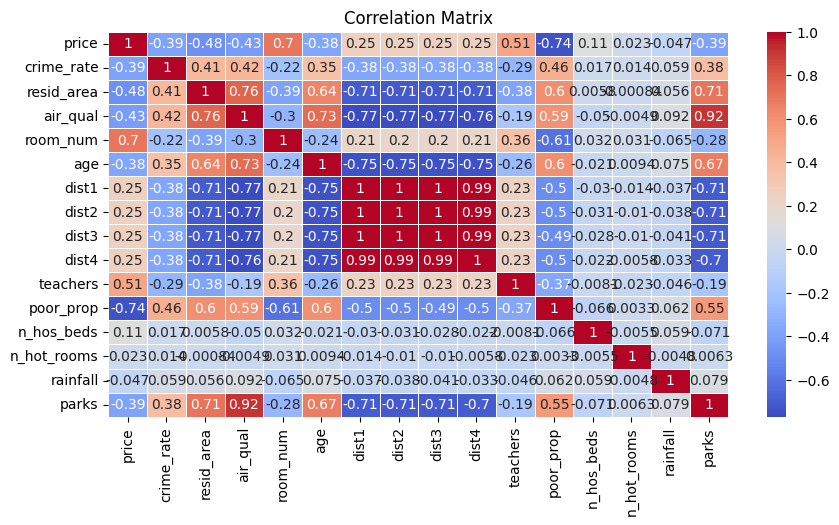

In [16]:
# Step 6: Visualize Data Relationships
# Pairplot to visualize relationships
correlation_matrix = data[continuous_vars].corr()  # Select only continuous variables

plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

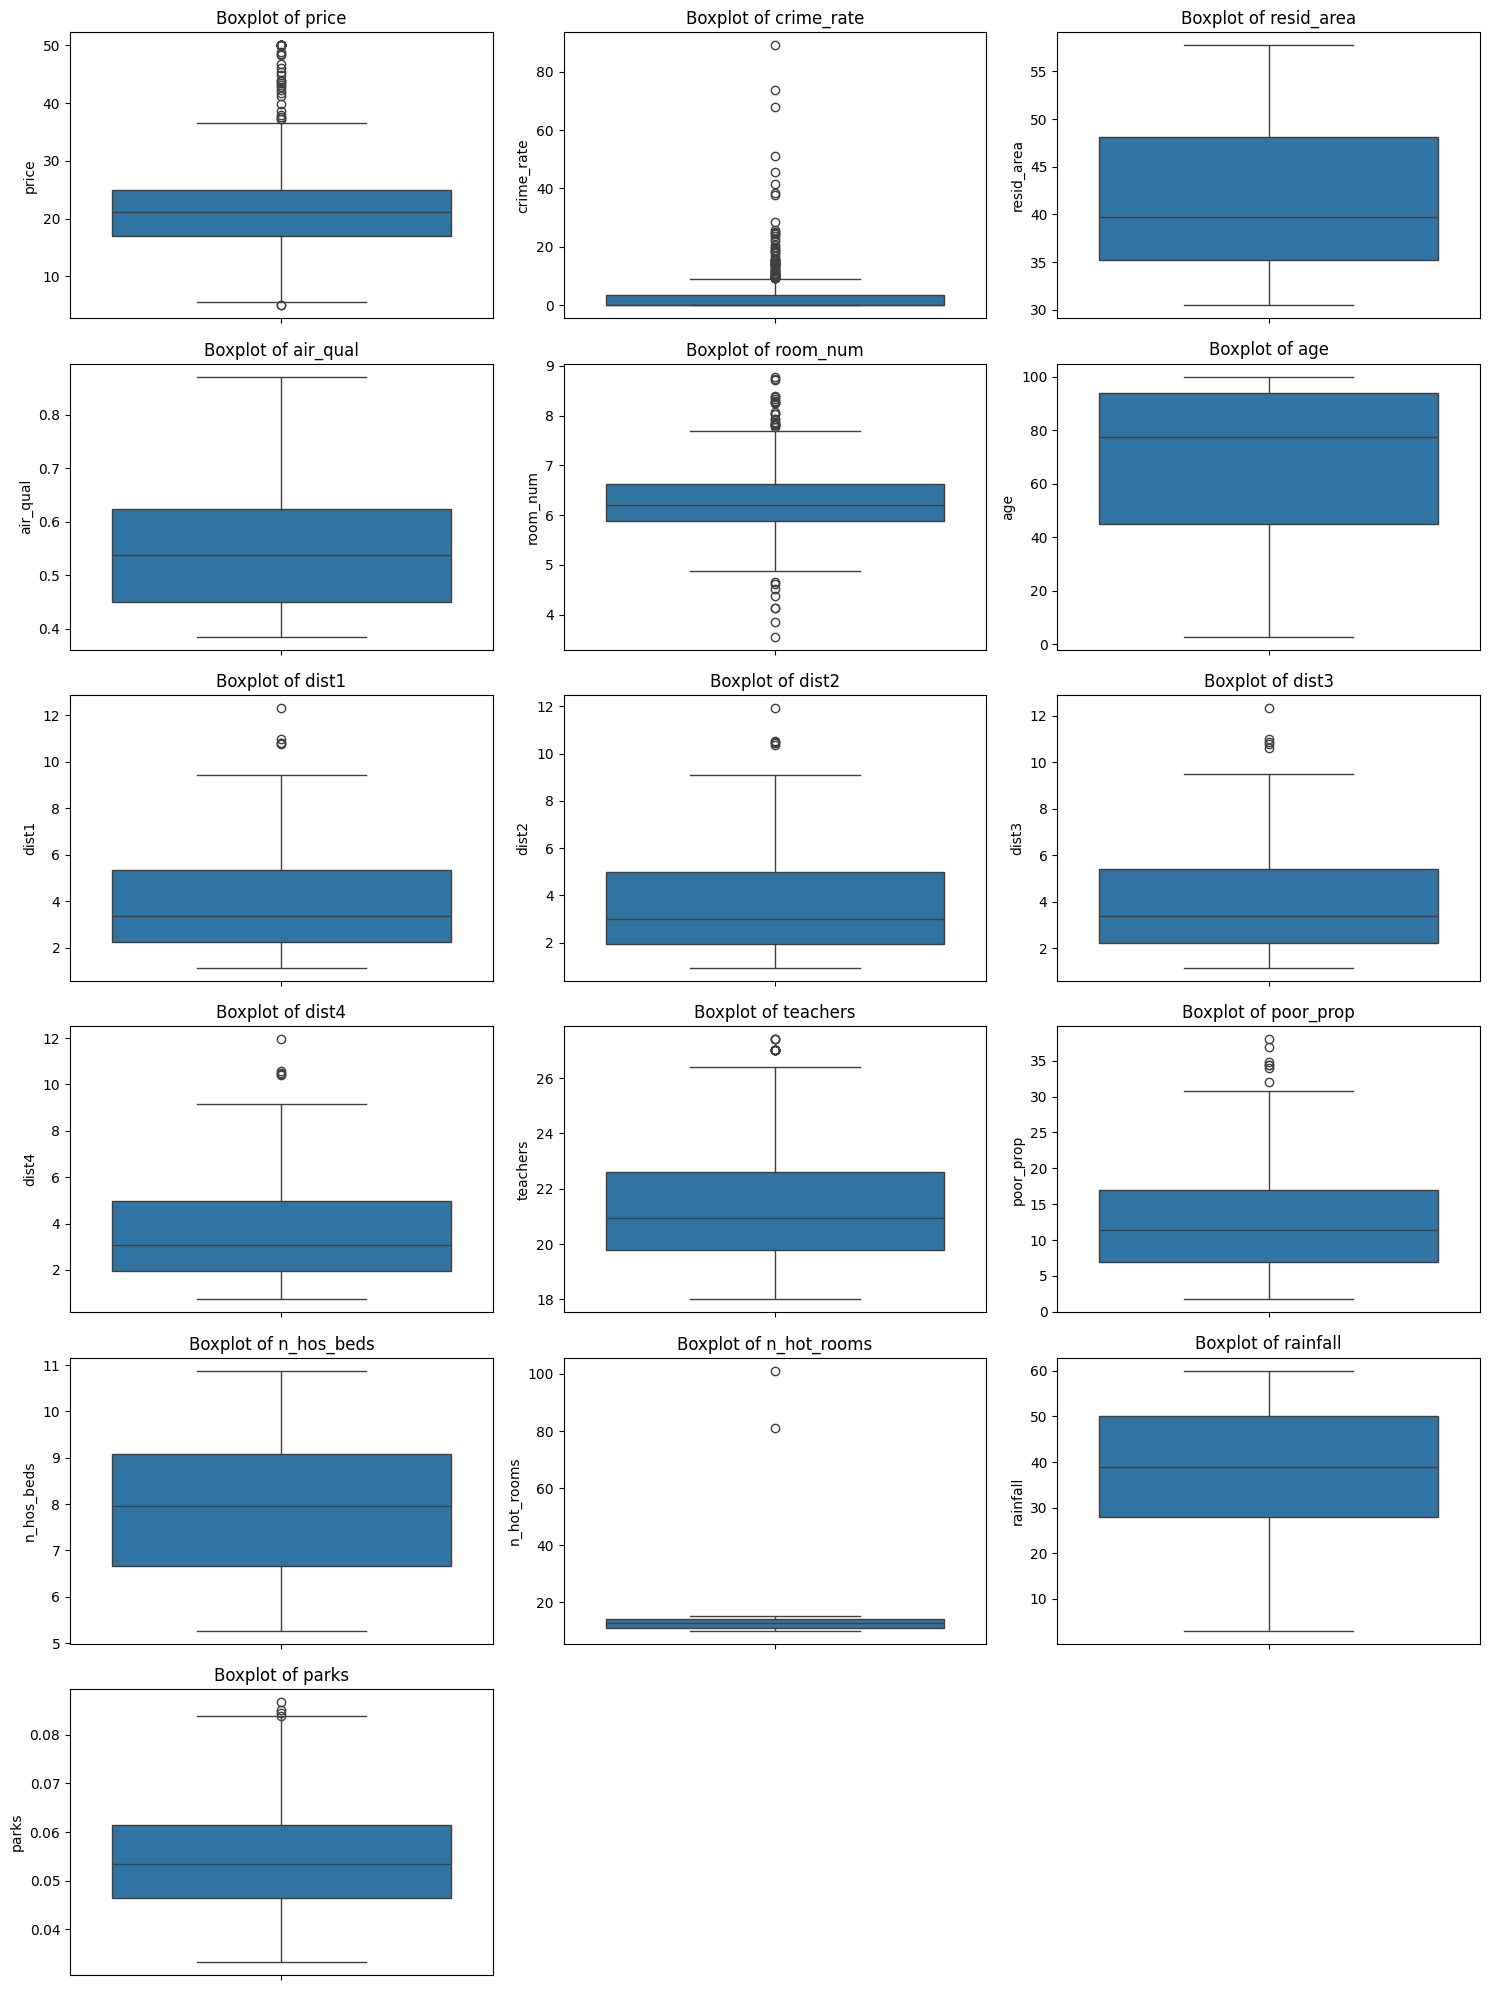

In [17]:
# Step 7: Handling Outliers
# Box plots to detect outliers
plt.figure(figsize=(15, 20))
for i, var in enumerate(continuous_vars):
    plt.subplot(6, 3, i + 1)  # Adjust layout to avoid the error
    sns.boxplot(y=data[var])
    plt.title(f'Boxplot of {var}')
plt.tight_layout()
plt.show()

In [18]:
# Step 8: Communicate Findings and Insights
# Summarize insights
print("Summary of Insights:")
print("- Distribution plots show that some variables are skewed.")
print("- Correlation matrix highlights strong correlations between some variables.")
print("- Box plots indicate potential outliers in several variables.")

# Save the cleaned and transformed data to a new CSV file
data_encoded.to_csv('cleaned_house_price_data.csv', index=False)
print("Cleaned data saved to 'cleaned_house_price_data.csv'")

Summary of Insights:
- Distribution plots show that some variables are skewed.
- Correlation matrix highlights strong correlations between some variables.
- Box plots indicate potential outliers in several variables.
Cleaned data saved to 'cleaned_house_price_data.csv'
